In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/pit/collection/mutations.csv', error_bad_lines=False, names = ["Class", "Package", "gc1", "gc2","gc3","Coverage","gc4"])

In [28]:
df.head()

,Class,Package,gc1,gc2,gc3,Coverage,gc4
0,TreeBidiMap.java,org.apache.commons.collections4.bidimap.TreeBi...,org.pitest.mutationtest.engine.gregor.mutators...,<init>,133,NO_COVERAGE,none
1,TreeBidiMap.java,org.apache.commons.collections4.bidimap.TreeBi...,org.pitest.mutationtest.engine.gregor.mutators...,checkKey,1255,NO_COVERAGE,none
2,TreeBidiMap.java,org.apache.commons.collections4.bidimap.TreeBi...,org.pitest.mutationtest.engine.gregor.mutators...,checkKeyAndValue,1281,NO_COVERAGE,none
3,TreeBidiMap.java,org.apache.commons.collections4.bidimap.TreeBi...,org.pitest.mutationtest.engine.gregor.mutators...,checkKeyAndValue,1282,NO_COVERAGE,none
4,TreeBidiMap.java,org.apache.commons.collections4.bidimap.TreeBi...,org.pitest.mutationtest.engine.gregor.mutators...,checkNonNullComparable,1238,NO_COVERAGE,none


In [29]:
df.drop('gc1', axis=1, inplace=True)
df.drop('gc2', axis=1, inplace=True)
df.drop('gc3', axis=1, inplace=True)
df.drop('gc4', axis=1, inplace=True)
df['Package'] = df['Package'].map(lambda x: str(x)[:x.rfind('.')])
df['Package'] = df['Package'].map(lambda x:  x if (x.find('$')+1 == 0) else  x[:x.find('$')+1] )
df['Class'] = df['Class'].map(lambda x: str(x)[:x.rfind('.java')])
df.rename(columns={'Class':'CLASS',
                          'Package':'PACKAGE'},
                 inplace=True)
df.head()


,CLASS,PACKAGE,Coverage
0,TreeBidiMap,org.apache.commons.collections4.bidimap,NO_COVERAGE
1,TreeBidiMap,org.apache.commons.collections4.bidimap,NO_COVERAGE
2,TreeBidiMap,org.apache.commons.collections4.bidimap,NO_COVERAGE
3,TreeBidiMap,org.apache.commons.collections4.bidimap,NO_COVERAGE
4,TreeBidiMap,org.apache.commons.collections4.bidimap,NO_COVERAGE


In [30]:
df = df.groupby(['CLASS','PACKAGE','Coverage'],as_index = False).size().unstack(fill_value=0)
df.head(100)

,Coverage,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT
CLASS,PACKAGE,,,,,
AbstractBagDecorator,org.apache.commons.collections4.bag,6,0,2,1,0
AbstractBidiMapDecorator,org.apache.commons.collections4.bidimap,0,0,6,0,0
AbstractBitwiseTrie,org.apache.commons.collections4.trie,1,0,38,0,0
AbstractCollectionDecorator,org.apache.commons.collections4.collection,16,0,0,0,0
AbstractDualBidiMap,org.apache.commons.collections4.bidimap,11,0,83,2,0
AbstractEmptyIterator,org.apache.commons.collections4.iterators,4,0,0,0,0
AbstractHashedMap,org.apache.commons.collections4.map,100,1,106,42,1
AbstractInputCheckedMapDecorator,org.apache.commons.collections4.map,9,0,8,4,0
AbstractIterableGetMapDecorator,org.apache.commons.collections4.splitmap,12,0,4,1,0


In [31]:
#Not MEMORY_ERROR
df['Total_Mutant'] =  (df['KILLED'] + df['NO_COVERAGE'] + df['SURVIVED'] + df['TIMED_OUT'])
df['Mutation_Score'] =  ((df['KILLED']+df['TIMED_OUT']) / df['Total_Mutant'])*100
print('Total Mutants  '+str(df.Total_Mutant.sum()))


Total Mutants  8235


In [32]:
print('Total Killed  '+str(df.KILLED.sum()+df.TIMED_OUT.sum()))

Total Killed  3444


In [33]:
print('Total TIMED_OUT  '+str(df.TIMED_OUT.sum()))

Total TIMED_OUT  15


In [34]:
print('Mutation Score  '+str((df.KILLED.sum()/df.Total_Mutant.sum())*100))
#df.reset_index()
#df.columns.tolist()

Mutation Score  41.63934426229508


In [35]:
df.to_csv('data.csv')
from google.colab import files
#files.download("data.csv")
df = pd.read_csv('data.csv', error_bad_lines=False)
df.head()


,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score
0,AbstractBagDecorator,org.apache.commons.collections4.bag,6,0,2,1,0,9,66.666667
1,AbstractBidiMapDecorator,org.apache.commons.collections4.bidimap,0,0,6,0,0,6,0.000000
2,AbstractBitwiseTrie,org.apache.commons.collections4.trie,1,0,38,0,0,39,2.564103
3,AbstractCollectionDecorator,org.apache.commons.collections4.collection,16,0,0,0,0,16,100.000000
4,AbstractDualBidiMap,org.apache.commons.collections4.bidimap,11,0,83,2,0,96,11.458333


In [36]:
df.count()

CLASS             264
PACKAGE           264
KILLED            264
MEMORY_ERROR      264
NO_COVERAGE       264
SURVIVED          264
TIMED_OUT         264
Total_Mutant      264
Mutation_Score    264
dtype: int64

In [37]:
df1 = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/jacoco/collection/jacoco/jacoco.csv', error_bad_lines=False)
df1['CLASS'] = df1['CLASS'].map(lambda x:  x if (x.find('.')+1 == 0) else  x[:x.find('.')] )
#aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
df1 = df1.groupby(df1['CLASS']).aggregate(sum).reset_index()
#df1.count()
df1.columns
#df1.head()

Index(['CLASS', 'INSTRUCTION_MISSED', 'INSTRUCTION_COVERED', 'BRANCH_MISSED',
       'BRANCH_COVERED', 'LINE_MISSED', 'LINE_COVERED', 'COMPLEXITY_MISSED',
       'COMPLEXITY_COVERED', 'METHOD_MISSED', 'METHOD_COVERED'],
      dtype='object')

In [0]:
df1['Statement_Percentage'] =  (df1['LINE_COVERED'] / (df1['LINE_COVERED'] + df1['LINE_MISSED'])) * 100

In [0]:
df1['Branch_Percentage'] =  (df1['BRANCH_COVERED'] / (df1['BRANCH_COVERED'] + df1['BRANCH_MISSED'])) * 100

In [40]:
df1['CC'] =  df1['COMPLEXITY_COVERED'] + df1['COMPLEXITY_MISSED'];
df1.CLASS.count()

270

In [41]:
merged_inner = pd.merge(left=df,right=df1, left_on='CLASS', right_on='CLASS')
merged_inner.CLASS.count()

264

In [42]:
df1[(~df1.CLASS.isin(merged_inner.CLASS))&(~df1.CLASS.isin(merged_inner.CLASS))]

,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
6,AbstractEmptyMapIterator,0,18,0,0,0,5,0,4,0,4,100.0,NaN,4
80,DefaultMapEntry,0,19,0,0,0,6,0,3,0,3,100.0,NaN,3
114,FunctorException,8,8,0,0,4,4,2,2,2,2,50.0,NaN,4
175,PatriciaTrie,7,6,0,0,2,2,1,1,1,1,50.0,NaN,2
242,UniqueFilterIterator,0,5,0,0,0,2,0,1,0,1,100.0,NaN,1
253,UnmodifiableMapEntry,0,24,0,0,0,7,0,4,0,4,100.0,NaN,4


Difference - Classes not covered in jacoco or PIT

In [43]:
df = merged_inner
df.columns
merged_inner.head()

,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
0,AbstractBagDecorator,org.apache.commons.collections4.bag,6,0,2,1,0,9,66.666667,9,39,0,4,3,8,2,9,2,7,72.727273,100.000000,11
1,AbstractBidiMapDecorator,org.apache.commons.collections4.bidimap,0,0,6,0,0,6,0.000000,13,17,0,0,3,5,3,4,3,4,62.500000,NaN,7
2,AbstractBitwiseTrie,org.apache.commons.collections4.trie,1,0,38,0,0,39,2.564103,40,186,7,25,9,45,9,26,3,16,83.333333,78.125000,35
3,AbstractCollectionDecorator,org.apache.commons.collections4.collection,16,0,0,0,0,16,100.000000,3,84,0,2,2,23,1,18,1,17,92.000000,100.000000,19
4,AbstractDualBidiMap,org.apache.commons.collections4.bidimap,11,0,83,2,0,96,11.458333,14,851,1,73,4,211,2,97,1,61,98.139535,98.648649,99


In [44]:
merged_inner.count()

CLASS                   264
PACKAGE                 264
KILLED                  264
MEMORY_ERROR            264
NO_COVERAGE             264
SURVIVED                264
TIMED_OUT               264
Total_Mutant            264
Mutation_Score          264
INSTRUCTION_MISSED      264
INSTRUCTION_COVERED     264
BRANCH_MISSED           264
BRANCH_COVERED          264
LINE_MISSED             264
LINE_COVERED            264
COMPLEXITY_MISSED       264
COMPLEXITY_COVERED      264
METHOD_MISSED           264
METHOD_COVERED          264
Statement_Percentage    264
Branch_Percentage       206
CC                      264
dtype: int64

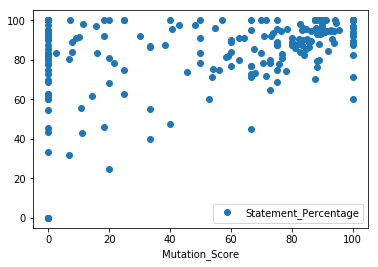

In [45]:
df.plot(x='Mutation_Score', y='Statement_Percentage', style='o')

In [46]:
df[['Mutation_Score','Statement_Percentage']].corr(method ='spearman')

,Mutation_Score,Statement_Percentage
Mutation_Score,1.000000,0.519628
Statement_Percentage,0.519628,1.000000


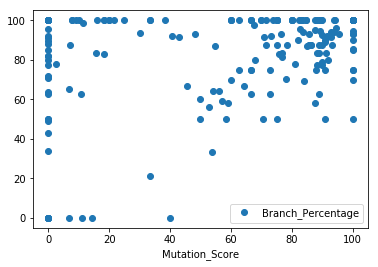

In [47]:
df.plot(x='Mutation_Score', y='Branch_Percentage', style='o')

In [48]:
df[['Mutation_Score','Branch_Percentage']].corr(method ='spearman')

,Mutation_Score,Branch_Percentage
Mutation_Score,1.000000,0.311782
Branch_Percentage,0.311782,1.000000


In [0]:
df.to_csv('collection-mu-st-branch.csv')
from google.colab import files
files.download("collection-mu-st-branch.csv")